# **AHBA Data Acquisition Notes**

This Google Colab notebook outlines the data acquisition process from the **Allen Human Brain Atlas (AHBA)** repository. It provides a comprehensive overview of the data types and methods used to fetch and process gene expression and anatomical data. The focus is on leveraging the AHBA data for **machine learning applications**, including gene expression profiling, spatial analysis, and integrative modeling.

Through this notebook, we will explore the **key datasets**, their structure, and practical applications, making it a valuable resource for anyone interested in **brain gene expression** and **computational neuroscience**.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Fetch Desikan-Killiany (Donor Spec.)**

This method allows us to obtain comprehensive information about the donor, including a **NIFTI image** of the donor's brain as well as details on the **labels and sections of the brain**.

---

## **Keys:**

### **Info:**
This dataset provides key anatomical and structural data, including the following columns:

#### **Key Columns in the Table:**

1. **sample_id:** Represents a unique identifier for each sample in the dataset.
2. **id:** An internal ID that corresponds to the sample number, which is identical to the `sample_id` in this table.
3. **label:** Describes the specific brain region or anatomical label associated with the sample.
4. **hemisphere:** Indicates the hemisphere of the brain where the sample was taken, either "L" (left) or "R" (right).
5. **structure:** Specifies the brain structure or region to which the sample belongs, such as "cortex" or "subcortex/brainstem".

---

### **Observations:**
- The dataset consists of **multiple brain regions**, some associated with the cortex and others with subcortical or brainstem areas.
- The samples are divided between the **left and right hemispheres**.
- The table is sorted by `sample_id`, which **increases sequentially**.
- The data matrix size is **83x4**.

---

### **Images:**
- This key provides access to the **corresponding images of the donor's brain**, allowing for visual analysis and anatomical mapping.
- There are 185 images for each donor
- donors  '9861', '10021', '12876', '14380', '15496', '15697'
---
### **CODE:**



In [2]:
!pip install abagen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 18.5 MB/s eta 0:00:00


In [8]:
import abagen
from abagen import reporting
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

atlas = abagen.fetch_desikan_killiany(native = True)

info = pd.read_csv(atlas['info'])

print(f"Number of regions: {len(info)}")

print(f"Column Data{info.columns}")

info.head()



Number of regions: 83
Column DataIndex(['id', 'label', 'hemisphere', 'structure'], dtype='object')


,id,label,hemisphere,structure
0,1,bankssts,L,cortex
1,2,caudalanteriorcingulate,L,cortex
2,3,caudalmiddlefrontal,L,cortex
3,4,cuneus,L,cortex
4,5,entorhinal,L,cortex


Donor: 9861, Number of images per donor: 185 
 Example:


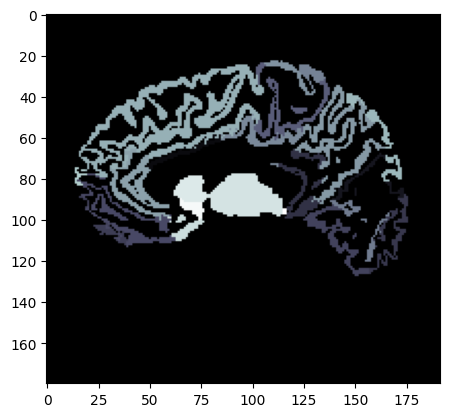

Donor: 10021, Number of images per donor: 185 
 Example:


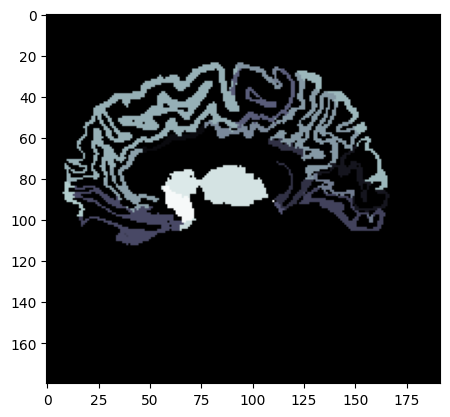

Donor: 12876, Number of images per donor: 182 
 Example:


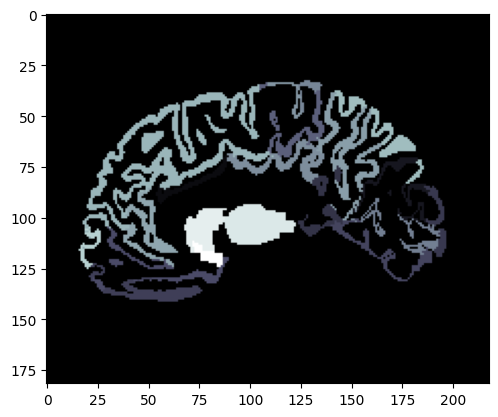

Donor: 14380, Number of images per donor: 182 
 Example:


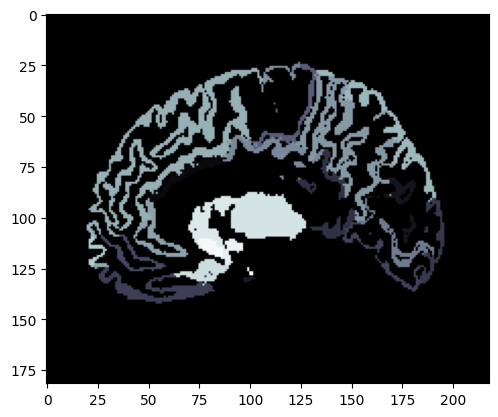

Donor: 15496, Number of images per donor: 182 
 Example:


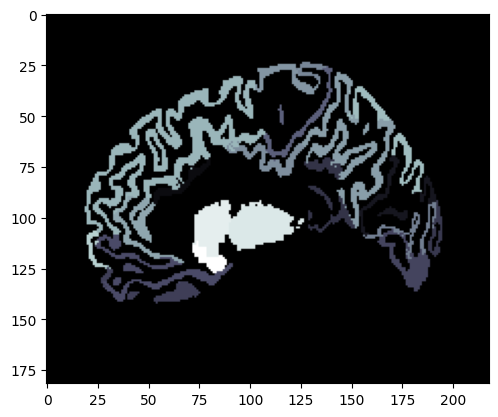

Donor: 15697, Number of images per donor: 182 
 Example:


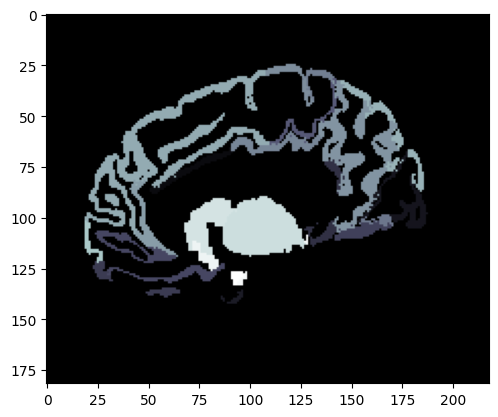

In [9]:
#image examples

for key in atlas['image'].keys():
  image = nib.load(atlas['image'][key])
  data = image.get_fdata()
  plt.imshow(data[100],cmap = 'bone')
  print(f"Donor: {key}, Number of images per donor: {len(data)} \n Example:")
  plt.show()


# **Left-to-Right MRI Slice Visualization (Donor 9861)**

This interactive visualization displays MRI slices from **left to right** for **donor 9861**. It uses an interactive slider to navigate through the slices, allowing for detailed inspection of brain anatomy along the **X-axis**.

---

### **Features:**
- **Left-to-Right Slice Navigation:** Moves through slices from the **left hemisphere to the right hemisphere**.
- **Interactive Slider:** Adjust the slider to view each slice dynamically.
- **Grayscale Display:** Uses a grayscale colormap for enhanced contrast and clarity.
- **Real-Time Visualization:** Instantly updates the image as the slider moves.


In [12]:
import abagen
import nibabel as nib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Fetch the Desikan-Killiany atlas for donor 9861
atlas = abagen.fetch_desikan_killiany(native=True)

# Load the MRI image for donor 9861
image = nib.load(atlas['image']['9861'])
data = image.get_fdata()

# Get the number of slices (from left to right - X axis)
num_slices = data.shape[0]
print(f"Donor: 9861, Number of slices (left to right): {num_slices} \nExample:")

# Function to display a selected slice (left to right)
def show_slice(slice_idx):
    plt.figure(figsize=(6, 6))
    plt.title(f"Donor 9861 - Left to Right Slice {slice_idx}")
    plt.imshow(data[slice_idx, :, :].T, cmap="bone", origin="lower")
    plt.axis("off")
    plt.show()

# Interactive slider to navigate slices from left to right
slice_slider = widgets.IntSlider(value=0, min=0, max=num_slices-1, step=1, description="Slice (L→R):")
display(widgets.interactive(show_slice, slice_idx=slice_slider))


Donor: 9861, Number of slices (left to right): 185 
Example:


interactive(children=(IntSlider(value=0, description='Slice (L→R):', max=184), Output()), _dom_classes=('widge…

---
# **Donor Information (AHBA Dataset)**

This image shows the **donor metadata** obtained from the **Allen Human Brain Atlas (AHBA)**. The dataset contains information about the six donors included in the study, presenting key demographic and medical attributes.

---

### **Key Columns:**
1. **Donor ID:** Unique identifier for each donor.
2. **Medical ID:** Internal ID linking the donor to medical records.
3. **Age:** Age of the donor at the time of sample collection.
4. **Sex:** Biological sex of the donor (e.g., Male, Female).
5. **Ethnicity:** Ethnic background of the donor.
6. **Medical Conditions:** Relevant medical conditions or diagnoses.
7. **Post Mortem Hours:** Time interval between death and sample collection.

---

### **Usage:**
The donor information is critical for:
- **Demographic Analysis:** Understanding gene expression variability due to age, sex, or ethnicity.
- **Medical Context:** Correlating gene expression with medical conditions.
- **Data Integrity:** Ensuring that post-mortem intervals are consistent for reliable RNA quality.

---

### **Example Visualization:**
The image above displays a **6x7 matrix** summarizing the attributes of each donor. This metadata is essential for downstream analyses and modeling, especially when examining potential demographic influences on gene expression patterns.
### **CODE:**

In [ ]:
donor_info = abagen.fetch_donor_info()
donor_info

,donor,uid,age,sex,ethnicity,medical_conditions,post_mortem_interval_hours
0,H0351.2001,9861,24,M,African American,History of asthma,23.0
1,H0351.2002,10021,39,M,African American,Possible small pituitary adenoma; single neuro...,10.0
2,H0351.1009,12876,57,M,Caucasian,History of atherosclerotic cardiovascular disease,25.5
3,H0351.1012,14380,31,M,Caucasian,Sudden cardiac arrest; benign spindle cell pro...,17.5
4,H0351.1015,15496,49,F,Hispanic,"Splenectomy, hypothyroidism treated with Levot...",30.0
5,H0351.1016,15697,55,M,Caucasian,"Coronary artery atherosclerosis, prescriptions...",18.0


# **Fetch Gene Group**

## **Abagen Fetch Gene Group Function**

### **Overview**
The `abagen.fetch_gene_group(group)` function is part of the **Abagen** library, which is designed for analyzing gene expression data from the **Allen Human Brain Atlas (AHBA)**. This function returns a list of **gene acronyms** that belong to a specified group, making it useful for **categorizing genes** based on their biological or anatomical relevance.

---

### **Parameters**
- **group (str):** The name of the desired gene group. Must be one of the following:
  - **'brain'** - Genes relevant to **general brain function**.
  - **'neuron'** - Genes associated specifically with **neurons**.
  - **'oligodendrocyte'** - Genes linked to **oligodendrocytes** (cells that form myelin in the CNS).
  - **'synaptome'** - Genes related to **synaptic function**.
  - **'layers'** - Genes associated with **cortical layers**.

#### **Returns**
- **genes (list of str):** A list of **gene acronyms** corresponding to the selected group.

---

### **Usage**
The **Fetch Gene Group** function is essential for:
- **Categorizing Gene Expression Data:** Enables efficient grouping of genes based on their biological role.
- **Data Filtering:** Allows researchers to **focus on specific gene types** for targeted analysis.
- **Gene Set Enrichment:** Facilitates the creation of **gene sets** for functional analysis.

---

### **Practical Applications**
1. **Neuroscience Research:** Identifying neuron-specific genes for targeted analysis.
2. **Machine Learning Models:** Integrating neuron-specific genes to enhance predictive accuracy.
3. **Data Preprocessing:** Efficiently filter and select relevant genes based on their classification.

---
### **CODE:**

In [ ]:
gene_group = abagen.fetch_gene_group('brain')

print(gene_group, end = ' ')


['A2ML1', 'AAK1', 'AATK', 'ABAT', 'ABCA2', 'ABCA3', 'ABCC12', 'ABCC8', 'ABCD2', 'ABCG4', 'ABCG8', 'ABHD12B', 'ABI2', 'ABLIM2', 'ACBD7', 'ACOT12', 'ACOT6', 'ACOT7', 'ACPT', 'ACRV1', 'ACSBG1', 'ACSL6', 'ACTL6B', 'ACTL7A', 'ACTL8', 'ACTN2', 'ACTR3B', 'ACVR1C', 'ADAD2', 'ADAM11', 'ADAM22', 'ADAM23', 'ADAM29', 'ADAMTS16', 'ADAMTS18', 'ADAMTS20', 'ADAMTS8', 'ADAP1', 'ADARB2', 'ADCY1', 'ADCY2', 'ADCY8', 'ADCYAP1', 'ADCYAP1R1', 'ADD2', 'ADIG', 'ADORA1', 'ADRA1B', 'ADRA1D', 'ADRB1', 'AFF2', 'AGAP2', 'AGAP3', 'AGBL1', 'AGBL4', 'AGPAT4', 'AGT', 'AGXT2', 'AHSG', 'AIF1L', 'AIFM3', 'AIPL1', 'AIRE', 'AJAP1', 'AK5', 'AKAP14', 'AKAP5', 'AKAP6', 'ALDOC', 'ALK', 'ALOX12B', 'ALOXE3', 'ALPI', 'ALPP', 'ALX3', 'ALX4', 'AMBN', 'AMH', 'AMPH', 'AMTN', 'AMZ1', 'ANK2', 'ANKFN1', 'ANKRD13B', 'ANKRD18B', 'ANKRD2', 'ANKRD24', 'ANKRD33B', 'ANKRD34B', 'ANKRD34C', 'ANKRD45', 'ANKRD62', 'ANKS1B', 'ANLN', 'ANO3', 'ANO4', 'ANP32D', 'AP3B2', 'APBA1', 'APBA2', 'APBB1', 'APC', 'APC2', 'APLN', 'APLNR', 'APLP1', 'APOD', 'APOE'

# **Fetch Microarray (Donor Spec.)**

## **Overview**
The `abagen.fetch_microarray()` function downloads **gene expression data** from the **Allen Human Brain Atlas (AHBA)** for all 6 donors. It returns a **nested dictionary** with keys corresponding to donor IDs, and each donor ID containing another dictionary with the following keys:

- **'annotation'** - Metadata about samples, including brain structure and coordinates.
- **'microarray'** - Gene expression data from microarray experiments.
- **'ontology'** - Information about brain region hierarchies and structures.
- **'pacall'** - Probe annotation data related to expression levels.
- **'probes'** - Gene-specific probe information.

---

### **Usage**
This function is useful when analyzing **gene expression across multiple brain regions**, especially for comparing the expression of specific genes across different brain structures.

---

## **Keys:**

### **Annotation Object in Microarray Data**

#### **Overview**
The **annotation object** contains metadata for each brain sample, including **structural and spatial information**. The key columns in the annotation data are:

- **structure_id:** Unique ID for the brain structure.
- **slab_num:** Number of the slab in the brain dissection.
- **well_id:** Identifier for the well used in the microarray.
- **slab_type:** Type of brain tissue (e.g., CX for cortex, CB for cerebellum).
- **structure_acronym:** Short code representing the brain structure.
- **structure_name:** Full name of the brain structure.
- **polygon_id:** Identifier for the anatomical polygon.
- **mri_voxel_x, mri_voxel_y, mri_voxel_z:** MRI coordinates of the voxel.
- **mni_x, mni_y, mni_z:** Standard **MNI space coordinates**.

---

### **Observations**
- The **annotation data** allows researchers to **correlate gene expression levels** with specific spatial locations in the brain.
- Machine learning models can leverage spatial features for **predicting functional brain regions** or identifying **pathological changes**.

---

## **Microarray Object in Microarray Data**

#### **Overview**
The **microarray object** contains **gene expression data** for each sample. The data is structured as a matrix where:

- **Rows:** Represent individual **probes** identified by `probe_id`.
- **Columns:** Represent individual **samples** identified by `sample_id`.
- **Values:** Correspond to **gene expression levels** obtained from microarray experiments.

---

### **Observations**
- The **microarray data** is essential for analyzing **gene expression patterns** across various brain regions.
- It allows for:
  - **Pattern Analysis:** Identifying regions with similar expression profiles.
  - **Gene Correlation Studies:** Determining relationships between genes based on **co-expression patterns**.
  - **Feature Engineering:** Extracting relevant features for predicting **gene function** or identifying biomarkers.

---

## **Ontology Object in Microarray Data**

#### **Overview**
The **ontology object** contains **hierarchical information** about brain regions, allowing researchers to understand the **relationships between different brain structures**. The key columns include:

- **id:** Unique identifier for the brain structure.
- **acronym:** Short abbreviation representing the brain region.
- **name:** Full name of the brain structure.
- **parent_structure_id:** ID of the **parent structure**, if applicable.
- **hemisphere:** Hemisphere where the structure is located (if specified).
- **graph_order:** **Hierarchical order** of the structure within the brain.
- **structure_id_path:** Path representing the **lineage** of the structure.
- **color_hex_triplet:** Hexadecimal color code for visualizing the brain structure.

---

### **Observations**
- The **ontology data** is crucial for building **hierarchical models** and **visualizations**.
- Machine learning models can use this data to **map brain structures to gene expression profiles**, identify structural relationships, and analyze **brain connectivity**.

---

## **Pacall Object in Microarray Data**

#### **Overview**
The **pacall object** contains **binary data** indicating whether a gene probe was detected (`1`) or not detected (`0`) for each sample. This data is vital for **filtering gene expression results** to retain only those with significant signals.

---

### **Observations**
- The **pacall data** helps determine the **presence or absence** of gene expression in each sample.
- It serves as a **quality control step**, ensuring that **noisy or undetected signals** do not interfere with gene expression analyses.
- By using pacall data, researchers can focus on **consistent and reproducible patterns** across brain samples.

---

## **Probes Object in Microarray Data**

#### **Overview**
The **probes object** contains metadata about **gene probes** used in the microarray analysis, mapping each probe to its corresponding gene. Key columns include:

- **probe_id:** Unique identifier for the probe.
- **probe_name:** Descriptive name of the probe.
- **gene_id:** Numerical identifier for the gene associated with the probe.
- **gene_symbol:** Symbol representing the gene.
- **gene_name:** Full name of the gene.
- **entrez_id:** **NCBI Entrez Gene ID**.
- **chromosome:** Chromosome number where the gene is located.

---

### **Observations**
- The **probes data** is essential for **mapping gene expression values** to specific genes and chromosomes.
- It aids in **data filtering**, ensuring only valid and mapped probes are used in downstream analyses.
- By integrating probe information, models can incorporate **gene-specific and chromosome-specific attributes** when predicting gene expression patterns or identifying gene functions.

---

### **Practical Applications**
1. **Data Quality Assurance:** Filtering out low-confidence or noisy signals.
2. **Gene Function Prediction:** Integrating probe data with gene expression for accurate prediction.
3. **Spatial Mapping:** Using annotation data to correlate **gene expression with spatial coordinates** in the brain.
4. **Hierarchical Modeling:** Utilizing ontology data to build models that account for **brain structure relationships**.
5. **Signal Detection:** Ensuring that only **reliable signals** are included in the analysis using **pacall data**.

---

By leveraging these **microarray data objects**, machine learning models can gain deeper insights into **brain gene expression patterns**, enabling more accurate and informative analyses.

### **CODE (Donor 9861)**

In [ ]:
files = abagen.fetch_microarray(donors='all', verbose=0)

print(files.keys())
data = files['9861']
ano = abagen.io.read_annotation(data['annotation'])
micro = abagen.io.read_microarray(data['microarray'])
onto = abagen.io.read_ontology(data['ontology'])
pacall = abagen.io.read_pacall(data['pacall'])
probes = abagen.io.read_probes(data['probes'])

dict_keys(['9861', '10021', '12876', '14380', '15496', '15697'])


In [ ]:
print('Annotation csv')
ano


Annotation csv


,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
sample_id,,,,,,,,,,,,,
1,4077,22,594,CX,PCLa-i,"paracentral lobule, anterior part, right, infe...",37470,87,52,116,5.9,-27.7,49.7
2,4323,11,2985,CX,Cl,"claustrum, right",40517,66,92,63,29.2,17.0,-2.9
3,4323,18,2801,CX,Cl,"claustrum, right",41516,66,81,104,28.2,-22.8,16.8
4,4440,18,2273,CX,LGd,"dorsal lateral geniculate nucleus, left",41473,116,94,101,-24.6,-24.6,1.3
5,4266,17,2785,CX,CA4,"CA4 field, right",41142,63,104,106,31.1,-31.3,-7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,4751,67,1090,CB,PV-III,"III, right, paravermis",51241,84,119,113,8.7,-43.4,-22.4
943,4752,67,1082,CB,PV-IV,"IV, right, paravermis",51239,84,108,122,8.5,-49.7,-8.9
944,4758,67,1074,CB,PV-VIIB,"VIIB, right, paravermis",56063,84,140,135,7.9,-72.3,-40.6


In [ ]:
print('Microarray csv')
micro

Microarray csv


sample_id,1,2,3,4,5,6,7,8,9,10,...,937,938,939,940,941,942,943,944,945,946
probe_id,,,,,,,,,,,,,,,,,,,,,
1058685,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,3.852665,3.849358,3.018556,3.203562,2.050227,3.487880,2.354469,2.586168,3.495279,3.306209
1058684,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.698639,2.106493,1.573482,2.028703,2.058318,1.620506,1.802832,1.698847,1.839290,1.703562
1058683,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.879796,1.576539,1.835648,1.664253,2.195771,1.832431,1.993473,1.864939,2.073033,1.907132
1058682,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,4.336135,4.904766,4.305006,5.202678,4.121053,4.507000,4.123025,4.020838,4.222393,4.523669
1058681,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.999358,6.289043,6.515205,6.893379,6.473620,6.326008,6.264416,5.800701,5.901888,6.491646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071207,4.987220,4.145995,4.589687,3.561543,3.304363,6.798598,3.590037,3.205259,3.040562,4.527843,...,5.407956,5.252000,5.337062,5.200674,4.997708,6.542050,6.427549,6.658812,6.649387,6.952641
1071208,4.784908,5.774458,7.344428,6.931995,7.082742,6.873591,6.432648,7.226248,6.561758,6.100225,...,7.053383,6.679642,6.410176,6.940930,7.099054,7.042016,6.884180,6.688225,7.090038,6.645675
1071209,1.600835,2.499161,3.375202,2.670347,2.907766,1.800546,3.780652,3.047936,2.936393,1.791319,...,1.827491,2.218251,3.268159,2.228904,2.171057,3.257813,1.964595,3.545005,3.489074,3.610024


In [ ]:
print('ontology csv')
onto

ontology csv


,id,acronym,name,parent_structure_id,hemisphere,graph_order,structure_id_path,color_hex_triplet
0,4005,Br,brain,NaN,NaN,0,/4005/,A0A0A0
1,4006,GM,gray matter,4005.0,NaN,1,/4005/4006/,787878
2,4007,Tel,telencephalon,4006.0,NaN,2,/4005/4006/4007/,D988A3
3,4008,Cx,cerebral cortex,4007.0,NaN,3,/4005/4006/4007/4008/,EDA65F
4,4009,FL,frontal lobe,4008.0,NaN,4,/4005/4006/4007/4008/4009/,E8CD59
...,...,...,...,...,...,...,...,...
1834,9420,3V,third ventricle,9418.0,NaN,1834,/4005/9352/9418/9420/,231F20
1835,9709,CP3V,choroid plexus of the third ventricle,9420.0,NaN,1835,/4005/9352/9418/9420/9709/,872601
1836,9421,4V,fourth ventricle,9418.0,NaN,1836,/4005/9352/9418/9421/,231F20
1837,9710,CP4V,choroid plexus of the fourth ventricle,9421.0,NaN,1837,/4005/9352/9418/9421/9710/,872601


In [ ]:
print('pacall csv')
pacall

pacall csv


sample_id,1,2,3,4,5,6,7,8,9,10,...,937,938,939,940,941,942,943,944,945,946
probe_id,,,,,,,,,,,,,,,,,,,,,
1058685,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1058684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1058682,1,1,0,0,0,1,0,0,0,1,...,1,1,1,1,0,1,1,1,1,1
1058681,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071207,1,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1071208,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1071209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('probes csv')
probes

probes csv


,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
probe_id,,,,,,
1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733,9
1058684,CUST_15185_PI416261804,731,C9,complement component 9,735,5
1058683,A_32_P203917,731,C9,complement component 9,735,5
1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740,11
1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740,11
...,...,...,...,...,...,...
1071207,A_32_P69683,1012195,A_32_P69683,AGILENT probe A_32_P69683 (non-RefSeq),<NA>,NaN
1071208,A_32_P87582,1012196,A_32_P87582,AGILENT probe A_32_P87582 (non-RefSeq),<NA>,NaN
1071209,A_32_P885445,1012197,A_32_P885445,AGILENT probe A_32_P885445 (non-RefSeq),<NA>,NaN


# **Fetch Raw MRI Images (Donor Spec.)**

## **Overview**
The `abagen.fetch_raw_mri()` function downloads **T1-weighted (T1w)** and **T2-weighted (T2w)** MRI images from the **Allen Human Brain Atlas (AHBA)** for selected donors. These MRI images provide **high-resolution anatomical data** that can be used to analyze **brain structure and connectivity**.

---

### **Data Structure**
The function returns a **two-level nested dictionary** where:
- **Top-Level Keys:** Represent **donor IDs**.
- **Second-Level Keys:** Include:
  - **'t1w'** - T1-weighted MRI image files.
  - **'t2w'** - T2-weighted MRI image files.

---

### **Usage**
The raw MRI data is essential for:
- **Integrating Anatomical and Gene Expression Data:** Combining structural MRI data with gene expression for **spatial mapping**.
- **Building Brain Mapping Models:** Utilizing MRI features to **map gene expression patterns**.
- **Image Processing Techniques:** Performing tasks such as **segmentation**, **registration**, and **enhancement**.
- **Enhancing Predictive Models:** Leveraging MRI features to improve the accuracy of **gene expression prediction** or **brain function modeling**.

---

### **Observations**
1. **High-Resolution Imaging:** T1w and T2w images provide detailed anatomical insights.
2. **Structural Variation:** Differences between T1 and T2 weighted images can reveal **tissue contrast and structural integrity**.
3. **Data Quality:** MRI data quality can significantly influence **model performance** when combined with gene expression data.

---

### **Practical Application**
- **Biomarker Discovery:** Identifying anatomical differences associated with **gene expression patterns**.
- **Brain Connectivity Studies:** Mapping connections between brain regions using MRI data.
- **Functional Integration:** Using structural MRI data to **correlate anatomical features with gene expression**.

---

By utilizing **MRI data** from the AHBA, researchers and machine learning engineers can gain deeper insights into **brain structure-function relationships**, enabling more accurate and informative analyses.# New Section

In [7]:
import abagen
import nibabel as nib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Fetch all raw MRI data for donor '9861'
raw_mri = abagen.fetch_raw_mri(donors='all')

# Load T1-weighted MRI image
t1w_image = nib.load(raw_mri['9861']['t1w'])
t1w_data = t1w_image.get_fdata()

# Load T2-weighted MRI image
t2w_image = nib.load(raw_mri['9861']['t2w'])
t2w_data = t2w_image.get_fdata()

# Get the number of slices for each image
num_slices_t1w = t1w_data.shape[2]
num_slices_t2w = t2w_data.shape[2]
print(f"Total slices: {num_slices_t1w} for T1w image")
print(f"Total slices: {num_slices_t2w} for T2w image")

# Function to display both T1w and T2w slices
def show_slices(slice_idx):
    plt.figure(figsize=(10, 5))

    # T1-weighted slice
    plt.subplot(1, 2, 1)
    plt.title(f"T1-weighted Slice {slice_idx}")
    plt.imshow(t1w_data[:, :, slice_idx].T, cmap="gray", origin="lower")
    plt.axis("off")

    # T2-weighted slice
    plt.subplot(1, 2, 2)
    plt.title(f"T2-weighted Slice {slice_idx}")
    plt.imshow(t2w_data[:, :, slice_idx].T, cmap="gray", origin="lower")
    plt.axis("off")

    plt.show()

# Interactive slider to navigate slices
slice_slider = widgets.IntSlider(value=0, min=0, max=min(num_slices_t1w, num_slices_t2w) - 1, step=1, description="Slice:")
display(widgets.interactive(show_slices, slice_idx=slice_slider))






Total slices: 192 for T1w image
Total slices: 192 for T2w image


interactive(children=(IntSlider(value=0, description='Slice:', max=191), Output()), _dom_classes=('widget-inte…

# **Fetch RNA-Seq (Donor Spec.)**

## **Overview**
The `abagen.fetch_rnaseq()` function downloads **RNA-sequencing data** from the **Allen Human Brain Atlas (AHBA)** for selected donors. This data provides valuable insights into **gene expression levels** across different brain regions.

---

### **Data Structure**
The function returns a **two-level nested dictionary** where:
- **Top-Level Keys:** Represent **donor IDs**.
- **Second-Level Keys:** Include:
  - **'counts'** - Raw RNA-seq read counts for each gene.
  - **'tpm'** - Transcripts Per Million (normalized gene expression).
  - **'ontology'** - Brain region hierarchies and structures.
  - **'genes'** - Metadata about genes, including IDs and locations.
  - **'annotation'** - Sample metadata and quality metrics.

---

### **Usage**
RNA-Seq data is essential for:
- **Quantifying Gene Expression:** Measure gene expression levels with high resolution.
- **Comparative Analysis:** Study differences in gene expression between brain regions.
- **Integrative Modeling:** Combine RNA-Seq data with MRI and microarray data for comprehensive analysis.
- **Biomarker Discovery:** Identify patterns that correlate gene expression with anatomical or clinical data.

---

### **Practical Applications**
- **Gene Expression Profiling:** Analyze gene expression levels across various brain regions.
- **Differential Expression Analysis:** Identify genes with varying expression levels between conditions or regions.
- **Integrative Omics:** Combine RNA-Seq with MRI and microarray data to enhance model accuracy and insight.

---

## **RNA-Seq Data Objects**

### **Counts Object**
The **counts object** contains **raw RNA-seq read counts** for each gene across multiple samples. It is organized as a matrix where:
- **Rows:** Represent individual genes (by `gene_symbol` or `gene_id`).
- **Columns:** Represent individual samples (`sample_id`).
- **Values:** Correspond to the **read count** of the gene in the given sample.

#### **Applications**
- **Gene Expression Quantification:** Estimate gene expression levels.
- **Normalization and Scaling:** Prepare data for downstream analysis.
- **Differential Gene Expression Analysis:** Identify genes with significant expression differences.

---

### **Genes Object**
The **genes object** contains **metadata about genes**, including gene IDs, symbols, and genomic information. This data helps interpret gene expression results and link them to genetic attributes.

#### **Key Columns**
- **gene_symbol:** Symbol representing the gene (e.g., A1BG).
- **gene_id:** Unique identifier for the gene.
- **entrez_id:** NCBI Entrez Gene ID for cross-referencing.
- **chromosome:** Chromosome number where the gene is located.
- **strand:** DNA strand direction (+ or -).
- **number_of_transcripts:** Number of transcript variants.
- **median_transcriptome_length:** Median length of gene transcripts.
- **median_genome_length:** Median gene length in the genome.
- **median_number_of_exons:** Number of exons.
- **median_gene_start:** Genomic start position.
- **median_gene_end:** Genomic end position.

---

### **Ontology Object**
The **ontology object** contains **hierarchical information** about brain regions. It helps understand **relationships between different brain structures**.

#### **Applications**
- **Brain Mapping:** Map gene expression profiles to specific brain regions.
- **Hierarchical Modeling:** Understand the structural relationships between brain areas.
- **Data Visualization:** Utilize color codes for easy representation of brain regions.

---

### **TPM Object (Transcripts Per Million)**
The **TPM object** contains **normalized RNA-seq expression data** that allows for cross-sample comparisons. It represents the **abundance of transcripts**, minimizing biases related to gene length or library size.

#### **Applications**
- **Comparative Gene Expression Analysis:** Enables comparison across samples.
- **Normalization and Scaling:** Suitable for downstream machine learning applications.
- **Expression Quantification:** Identifying highly expressed genes in specific brain regions.

---

### **Annotation Object**
The **annotation object** contains **metadata about RNA-seq samples**, providing details about sample characteristics and quality metrics.

#### **Key Columns**
- **RNAseq_sample_name:** Unique sample name.
- **replicate_sample:** Indicates if the sample is a technical replicate.
- **sample_name:** General name for the sample.
- **well_id:** Well identifier.
- **microarray_run_id:** ID for the microarray run.
- **ontology_color:** Hex color code for the brain structure.
- **main_structure:** Primary brain structure associated with the sample.
- **sub_structure:** Sub-structure of the primary brain region.
- **ontology_structure_id:** ID of the brain structure in the ontology.
- **ontology_structure_acronym:** Abbreviation for the brain structure.
- **RIN_RNA_quality:** RNA Integrity Number (quality indicator).
- **Base Percentage Columns (A.Pct, C.Pct, G.Pct, T.Pct, N.Pct):** Percentages of nucleotide bases in the sample.

#### **Applications**
- **Quality Control:** Verify that only high-quality RNA samples are used.
- **Batch Effect Analysis:** Identify variability between RNA-seq runs.
- **Data Normalization:** Adjust for differences in sample quality and preparation.

---

## **Why Use RNA-Seq Data?**
RNA-Seq data from the AHBA provides comprehensive and detailed information on **gene expression across different brain regions**. By leveraging RNA-Seq data:
- Machine learning engineers can develop **predictive models** to understand gene regulation.
- Researchers can investigate **gene function and structure relationships**.
- Biomedical applications can identify **biomarkers or gene signatures** related to specific brain functions or pathologies.

By integrating **RNA-Seq data** with other modalities (like **MRI and microarray data**), a holistic understanding of **brain function and gene regulation** can be achieved.

In [19]:
rna_seq = abagen.fetch_rnaseq(donors='9861')
donor_9861 = rna_seq['9861']
ano = abagen.io.read_annotation(donor_9861['annotation'])
counts =  abagen.io.read_annotation(donor_9861['counts'])
genes =  abagen.io.read_annotation(donor_9861['genes'])
onto =  abagen.io.read_annotation(donor_9861['ontology'])
tpm =  abagen.io.read_annotation(donor_9861['tpm'])

In [18]:
print('RNA annotations')
ano

RNA annotations


,RNAseq_sample_name,replicate_sample,sample_name,well_id,microarray_run_id,ontology_color,main_structure,sub_structure,structure_id,structure_acronym,...,brain,million_clusters,clip_percentage,RIN_RNA_quality,rnaseq_run_id,A.Pct,C.Pct,G.Pct,T.Pct,N.Pct
sample_id,,,,,,,,,,,,,,,,,,,,,
1,S010002_L7.LB16,No,S010002,105,275-104,#FF7B62,PL,SPL,4101,SPL-s,...,1,36.467,6.56,8.0,H15699,25.41,25.22,24.15,25.21,0.01
2,S010003_L7.LB19,No,S010003,113,275-104,#FF7B62,PL,SPL,4101,SPL-s,...,1,52.991,24.45,7.5,V00091,20.87,7.14,26.30,24.34,23.40
3,S010006_L8.LB27,No,S010006,193,275-104,#FF7B62,PL,SPL,4099,SPL-i,...,1,37.405,4.23,7.2,H15699,25.88,24.43,23.74,25.95,0.01
4,S010007_L4.LB20,No,S010007,145,275-104,#FF5D62,PL,AnG-s,4113,AnG-s,...,1,29.974,21.40,6.0,H15699,26.29,25.52,24.35,23.84,0.01
5,S010017_L1.LB2,No,S010017,114,275-104,#E8D959,FL,SFG-l,4027,SFG-l,...,1,34.290,2.26,7.3,H16345,24.97,24.95,24.71,25.36,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,S010536_L1.LB20,No,S010536,1217,275-115,#895BFF,Str,Putamen,4289,Pu,...,1,41.143,53.84,6.6,V00095,44.40,13.38,26.87,24.60,23.09
118,S010536_L8.LB20,Yes,S010536,1217,275-115,#895BFF,Str,Putamen,4289,Pu,...,1,48.170,2.10,6.6,H16345,25.10,24.57,24.75,25.57,0.00
119,S010543_L2.LB4,No,S010543,1178,275-112,#9C53E8,GP,GP,4298,GPe,...,1,47.745,44.92,5.6,V00091,30.86,14.62,25.90,25.26,24.00


In [20]:
print('RNA counts')
counts

RNA counts


,A1BG,50.72,73.58,43.15,35.03,67.32,54,62.43,51.94,16.43,...,38,52.59,53.89,48.86,81,64.1,226.74,128.86,214.95,95.85
sample_id,,,,,,,,,,,,,,,,,,,,,
1,A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,...,102.45,81.88,92.86,86.10,36.33,44.25,40.36,24.97,14.68,20.69
2,A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,...,9.94,8.84,7.94,9.31,3.00,0.00,1.99,5.00,1.01,1.99
3,A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,...,30.81,28.07,25.69,15.37,39.57,44.70,83.19,86.93,61.43,70.41
4,A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,...,1812.89,2628.93,1573.98,1935.88,4892.97,4506.99,6336.45,6727.81,5459.27,8036.99
5,A2ML1,26.94,63.06,58.29,12.83,51.94,34.96,28.03,74.32,39.31,...,6.99,12.15,16.13,15.33,96.11,81.02,104.00,133.87,62.02,151.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22313,ZYX,4072.00,3803.99,2946.05,2291.58,2922.28,1207.00,1951.86,1926.95,965.00,...,2617.00,2884.91,2892.01,3655.85,697.00,753.00,1388.00,1185.00,1008.00,1012.00
22314,ZZEF1,1354.98,1760.98,1285.94,755.00,1373.24,734.16,1149.93,1244.00,610.00,...,2293.01,2639.63,2546.95,2568.99,804.00,714.00,1169.00,1262.00,890.00,1200.00
22315,ZZZ3,380.00,893.02,479.95,249.00,496.98,364.00,525.00,675.04,322.03,...,610.00,621.00,505.00,539.32,410.01,355.00,430.00,712.72,446.98,676.00


In [21]:
print('RNA genes')
counts

RNA genes


,A1BG,50.72,73.58,43.15,35.03,67.32,54,62.43,51.94,16.43,...,38,52.59,53.89,48.86,81,64.1,226.74,128.86,214.95,95.85
sample_id,,,,,,,,,,,,,,,,,,,,,
1,A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,...,102.45,81.88,92.86,86.10,36.33,44.25,40.36,24.97,14.68,20.69
2,A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,...,9.94,8.84,7.94,9.31,3.00,0.00,1.99,5.00,1.01,1.99
3,A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,...,30.81,28.07,25.69,15.37,39.57,44.70,83.19,86.93,61.43,70.41
4,A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,...,1812.89,2628.93,1573.98,1935.88,4892.97,4506.99,6336.45,6727.81,5459.27,8036.99
5,A2ML1,26.94,63.06,58.29,12.83,51.94,34.96,28.03,74.32,39.31,...,6.99,12.15,16.13,15.33,96.11,81.02,104.00,133.87,62.02,151.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22313,ZYX,4072.00,3803.99,2946.05,2291.58,2922.28,1207.00,1951.86,1926.95,965.00,...,2617.00,2884.91,2892.01,3655.85,697.00,753.00,1388.00,1185.00,1008.00,1012.00
22314,ZZEF1,1354.98,1760.98,1285.94,755.00,1373.24,734.16,1149.93,1244.00,610.00,...,2293.01,2639.63,2546.95,2568.99,804.00,714.00,1169.00,1262.00,890.00,1200.00
22315,ZZZ3,380.00,893.02,479.95,249.00,496.98,364.00,525.00,675.04,322.03,...,610.00,621.00,505.00,539.32,410.01,355.00,430.00,712.72,446.98,676.00


In [22]:
print('RNA Ontology')
onto

RNA Ontology


,id,acronym,name,parent_structure_id,hemisphere,graph_order,structure_id_path,color_hex_triplet
sample_id,,,,,,,,
1,4005,Br,brain,NaN,NaN,0,/4005/,A0A0A0
2,4006,GM,gray matter,4005.0,NaN,1,/4005/4006/,787878
3,4007,Tel,telencephalon,4006.0,NaN,2,/4005/4006/4007/,D988A3
4,4008,Cx,cerebral cortex,4007.0,NaN,3,/4005/4006/4007/4008/,EDA65F
5,4009,FL,frontal lobe,4008.0,NaN,4,/4005/4006/4007/4008/4009/,E8CD59
...,...,...,...,...,...,...,...,...
1835,9420,3V,third ventricle,9418.0,NaN,1834,/4005/9352/9418/9420/,231F20
1836,9709,CP3V,choroid plexus of the third ventricle,9420.0,NaN,1835,/4005/9352/9418/9420/9709/,872601
1837,9421,4V,fourth ventricle,9418.0,NaN,1836,/4005/9352/9418/9421/,231F20


In [23]:
print('RNA TPM')
tpm

RNA TPM


,A1BG,3.16195960875952e-06,3.25853564906857e-06,2.64181667931534e-06,3.10866229981719e-06,4.03985744403757e-06,4.3336184163496e-06,4.02545126267447e-06,2.97445415877259e-06,1.88164992644928e-06,...,3.45308213124024e-06,4.18700471136037e-06,4.81102310605805e-06,4.16157269613782e-06,6.53880506121836e-06,4.44313237912859e-06,1.07961660094494e-05,5.86731921495156e-06,1.04664379455879e-05,5.19877180583676e-06
sample_id,,,,,,,,,,,,,,,,,,,,,
1,A1BG-AS1,5.178069e-06,4.948610e-06,4.238131e-06,4.075050e-06,4.467568e-06,1.745767e-06,5.223524e-06,3.281134e-06,2.337282e-06,...,7.639799e-06,5.353240e-06,6.806401e-06,6.018209e-06,2.411404e-06,2.515371e-06,1.581258e-06,9.329990e-07,5.893017e-07,9.203809e-07
2,A1CF,3.544914e-08,2.427387e-08,6.535814e-08,1.612159e-08,5.255629e-08,2.913073e-08,1.196508e-08,0.000000e+00,0.000000e+00,...,1.641368e-07,1.283257e-07,1.290715e-07,1.440339e-07,4.432816e-08,0.000000e+00,1.742187e-08,4.132652e-08,9.118127e-09,1.952420e-08
3,A2LD1,1.088394e-06,1.922628e-06,1.952536e-06,1.408353e-06,1.463647e-06,1.854015e-06,1.664973e-06,8.527213e-07,7.791031e-07,...,1.816362e-06,1.454675e-06,1.491791e-06,8.507376e-07,2.084369e-06,2.007608e-06,2.587033e-06,2.571861e-06,1.962172e-06,2.477960e-06
4,A2M,4.272174e-05,5.538482e-05,6.106004e-05,3.081461e-05,6.707973e-05,6.928951e-05,5.553703e-05,6.921014e-05,7.029073e-05,...,6.027224e-05,7.676719e-05,5.149413e-05,6.032053e-05,1.455172e-04,1.135298e-04,1.114684e-04,1.120086e-04,9.890017e-05,1.590071e-04
5,A2ML1,5.505307e-07,9.162441e-07,1.167027e-06,3.727597e-07,1.035981e-06,9.177594e-07,5.901766e-07,1.394373e-06,1.474582e-06,...,2.078406e-07,3.176464e-07,4.721168e-07,4.273048e-07,2.558749e-06,1.825361e-06,1.638113e-06,1.994362e-06,1.006443e-06,2.687346e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22313,ZYX,1.917860e-04,1.272963e-04,1.361714e-04,1.535808e-04,1.331403e-04,7.316314e-05,9.492230e-05,8.333048e-05,8.341005e-05,...,1.796197e-04,1.734904e-04,1.951320e-04,2.351983e-04,4.257128e-05,3.936911e-05,5.007502e-05,4.071839e-05,3.732200e-05,4.136676e-05
22314,ZZEF1,1.247528e-05,1.153152e-05,1.159296e-05,9.882368e-06,1.238882e-05,8.680244e-06,1.089861e-05,1.051576e-05,1.030804e-05,...,3.072854e-05,3.109583e-05,3.360534e-05,3.226363e-05,9.661099e-06,7.228941e-06,8.317260e-06,8.467139e-06,6.536879e-06,9.559624e-06
22315,ZZZ3,9.354449e-06,1.562956e-05,1.157862e-05,8.717311e-06,1.192556e-05,1.151492e-05,1.332164e-05,1.525894e-05,1.455236e-05,...,2.186533e-05,1.954870e-05,1.781136e-05,1.811832e-05,1.314240e-05,9.644796e-06,8.151947e-06,1.279346e-05,8.723741e-06,1.442144e-05
